# Домашнее задание 4. Реализация MinHash и MinHashLSH.

## Алгоритм MinHash. https://en.wikipedia.org/wiki/MinHash

1) Разбиваем текст на токены/шинглы \
2) Берем хеш функцию от каждого шингла \
3) Выбираем для каждого документа первый минимальный хеш (не пустой) и индекс этого элемента записываем в матрицу сигнатур \
4) Получаем матрицу сигнатур: премешиваем строки -> первый минимальный хеш может измениться -> выбираем (повторяем это N раз) \
5) Считаем расстояние жаккарда по полученной матрице

## пример:

возьмем 3 документа: 
- Doc1 = 'я люблю Париж' 
- Doc2 = 'я не люблю Париж' 
- Doc3 = 'я люблю Рим' 


1) посплитим их на слова (тут можно усложнять, брать шинглы, обученный токенезатор и т.д.) \

- Doc1 = ['я', 'люблю', 'Париж'] 
- Doc2 = ['я', 'не люблю', 'Париж'] 
- Doc3 = ['я', 'люблю', 'Рим']

2) составим матрицу встречаемости каждого из слов

                Doc1	Doc2	Doc3
    1	я	      1	     1	     1
    2	люблю	  1	     1	     1
    3	Париж	  1	     1	     0 
    4	не	      0	     1	     0
    5	Рим	      0	     0	     1


3) Перемешаем индексы (чтобы перемешивать - можно использовать хеш функцию, которую применяем к индексу)


## Первое перемешивание:

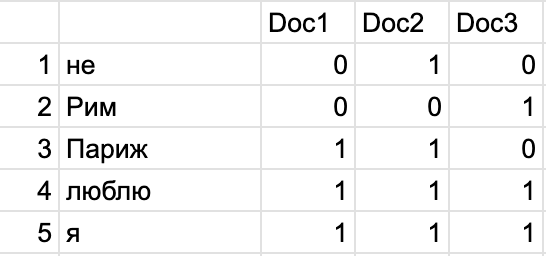

In [11]:
from IPython.display import Image
Image('image_minhash_2.png') 

Далее для каждого перемешивания находим первый не пустой элемент в каждом из столцов. Выписываем НОВЫЕ индексы первых непустых элементов.

для первого перемешивания: 
- [3, 1, 2] 


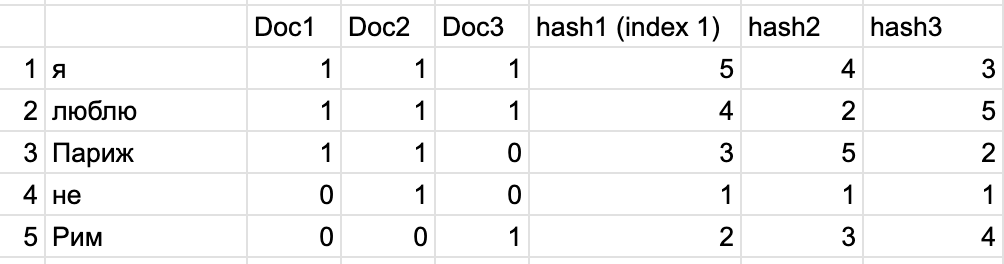

In [12]:
from IPython.display import Image
Image('image_minhash.png') 

для второго перемешивания: \
[2, 1, 2] \
для третьего: \
[2, 1, 3]


4) получаем матрицу сигнатур 



        Doc1 Doc2 Doc3  
        [3,   1,    2]  
        [2,   1,    2]  
        [2,   1,    3] 

5) Расстояние Жаккарда:

          Doc1 Doc2 Doc3 
    Doc1    1    0   1/2 
    Doc2    0    1    0  
    Doc3    1/2  0    1  
    
    
Получаем, что 1 и 3 документ хоть как-то похожи, а больше похожих пар нет.

In [ ]:
import pandas as pd
import numpy as np
from minhash import MinHash

In [ ]:
Docs = ['я люблю Париж', 
'я не люблю Париж' ,
'я люблю Рим']

In [ ]:
minhash = MinHashLSH(num_permutations=5, num_buckets=3, threshold=0.3)
answer = minhash.run_minhash_lsh(Docs)

In [ ]:
minhash.get_occurrence_matrix(df['text'][:5])

In [ ]:
answer = minhash.run_minhash_lsh(Docs)
print(answer)

## Алгоритм MinHashLSH. 

Одна из самых дорогих операций - это попарное сравнения похожести двух объектов. Давайте разобьем матрицу сигнатур на N батчей и будем сравнивать документы внутри небольших батчей. Если сигнатуры документа А и B полностью совпадают - то документы похожи. То есть если совпали хотя бы в одном бакете - документы похожи, если нет - то считаем что нет. Далее к оставшимся документам  уже можно применить полноценный MinHash без батчей.


Возьмем матрицу сигнатур из первого примера:


    Doc1 Doc2 Doc3  
    [3,   1,    2]  
    [2,   1,    2]  
    [2,   1,    3] 
    [1,   1,    1]
    
    
И разобем ее на 2 бакета:



    Doc1 Doc2 Doc3  
    [3,   1,    2]  b1
    [2,   1,    2]  b1
    [2,   1,    3]  b2
    [1,   1,    1]  b2
    
    
Если сравнивать по бакетам - то кандидатами на похожие являются только документы Doc2, Doc3.


В задании для простоты, давайте считать что баскеты будем распределять по порядку как на примере.

In [ ]:
from minhashlsh import MinHashLSH

In [ ]:
min_hash_lsh = MinHashLSH(5,10)

In [ ]:
min_hash_lsh.run_minhash_lsh(Docs)